In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Download Scipy command:
# python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
import scipy.stats as st

In [10]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
249


In [66]:
#mouse_read = mouse_metadata.groupby(["Mouse ID"]).size()
# Combine the data into a single dataset
Study_Mouse_Data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
index = Study_Mouse_Data.index
number_of_rows = len(index) #find length of index.
print("number of rows", number_of_rows, sep='\n')
# Display the data table for preview
Study_Mouse_Data

number of rows
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Total missing values for each feature
print(Study_Mouse_Data.isnull().sum()) # no null values found
# Checking the number of mice.

Total_mice = len(set(mouse_metadata["Mouse ID"]))
print("Total mice: " + str(Total_mice))

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
Total mice: 249


In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#DataFrame.duplicated(subset = None, keep = ‘first’)
Mouse_Time_duplicate_rows = Study_Mouse_Data[Study_Mouse_Data.duplicated(["Mouse ID", "Timepoint"], keep = "first")] 
print("Duplicate Rows based on Mouse ID and Timepoint :", sep='\n') 
Mouse_Time_duplicate_rows


Duplicate Rows based on Mouse ID and Timepoint :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_id_duplicate_rows = Study_Mouse_Data[Study_Mouse_Data.duplicated(subset=None, keep='first')]
print("Duplicate Rows based on Mouse ID :", sep='\n') 
Mouse_id_duplicate_rows


Duplicate Rows by (Mouse ID:)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newStudy_Mouse_Data = Study_Mouse_Data.reset_index()
newStudy_Mouse_Data = newStudy_Mouse_Data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = "first")
newStudy_Mouse_Data = newStudy_Mouse_Data.set_index("index")
print("New Dataframe", sep='\n')
newStudy_Mouse_Data
#df1 = df.reset_index().drop_duplicates(subset=['Age','Height'],
                                      # keep='first').set_index('index')

New Dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
newTotal_mice = len(set(newStudy_Mouse_Data["Mouse ID"]))
print("Total mice new: " + str(newTotal_mice))

Total mice new: 249


In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sta_dev_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_df = pd.DataFrame({"Mean": round(mean_regimen_df,2), "Median":round(Median_regimen_df,2),
                           "Variance":round(variance_regimen_df,2), "Standard Deviation":round(sta_dev_regimen_df,2),
                           "SEM":round(SEM_regimen_df,2)})
print("summary statistics table", sep='\n')
regimen_df

summary statistics table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#regimen_df.describe()
aggregation_regimen_df = newStudy_Mouse_Data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
print(aggregation_regimen_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


In [152]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_taken = newStudy_Mouse_Data.groupby(["Drug Regimen"]).count()["Timepoint"]
measurements_taken


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

<AxesSubplot:xlabel='Drug Regimen'>

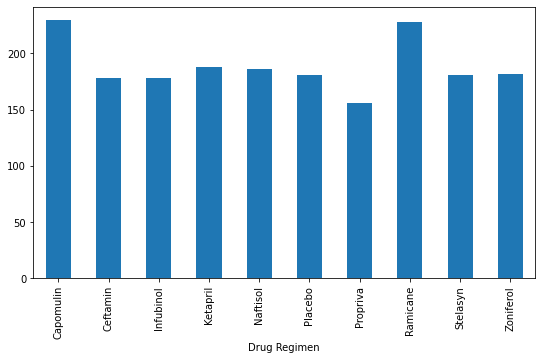

In [197]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_taken.plot(kind="bar", figsize=(9,5)) # first create a Pandas Series or DataFrame and then using the .plot() command. Dataframe.plot.bar()
